In [ ]:
import matplotlib.pyplot as plt

# LOAD DATASET
import os
from util.data_loader import load_dataset

BASE_PATH = os.path.dirname(os.getcwd()) + "/data"

# Load data without subsampling
x_train, y_train, x_test, feature_names = load_dataset(path_x_train=BASE_PATH + "/x_train.csv",
                                                      path_y_train=BASE_PATH + "/y_train.csv",
                                                      path_x_test=BASE_PATH + "/x_test.csv",
                                                      sub_sample=False)

In [ ]:
# REMOVE USELESS FEATURES
from util.features_info import FEATURES_DICT
from util.features_util import keep_features
feature_indexes = dict(zip(feature_names, range(len(feature_names))))
x_clean, clean_features, clean_feature_index = keep_features(x_train, FEATURES_DICT.keys(), feature_names, feature_indexes)

x_test_clean, clean_features, clean_feature_index = keep_features(x_test, FEATURES_DICT.keys(), feature_names, feature_indexes)

In [3]:
# PREPROCESS KEPT FEATURES
import numpy as np
from util.features_info import REPLACEMENT_LIST
from util.preprocessing import preprocessing_pipeline
x_preprocessed = preprocessing_pipeline(x_clean, 
                                        where=clean_features, 
                                        feature_index=clean_feature_index,
                                        nan_replacement=REPLACEMENT_LIST)

# x_test_preprocessed = preprocessing_pipeline(x_test_clean, 
#                                              where=clean_features, 
#                                              feature_index=clean_feature_index, 
#                                              nan_replacement=REPLACEMENT_LIST)

C:\Users\jsayd\anaconda3\envs\ml\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


In [4]:
# Split train-validation
from util.data_loader import split_train_validation
(x_tr, x_va, y_tr, y_va) = split_train_validation(x_preprocessed, y_train, valid_proportion=0.2)

In [5]:
# oversample training set
from util.data_loader import custom_random_oversampling
x_tr_oversampled, y_tr_oversampled = custom_random_oversampling(x_tr, y_tr[:,1])

In [80]:
import numpy as np

def min_max_normalize(arr: np.ndarray):
    arr_normalized = np.empty_like(arr)
    for column in range(arr.shape[1]):
        arr_normalized[:, column] = (arr[:, column] - arr[:, column].min()) / (arr[:, column].max() - arr[:, column].min())
    return arr_normalized

# with standardize I got best_gamma=1 several times
def standardize(arr: np.ndarray):
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)
    arr_std = (arr - mean) / std
    return arr_std

In [67]:
# Normalize and add bias column for TRAINING
x_tr_normalized = min_max_normalize(x_tr_oversampled)
x_tr_normalized = np.append(x_tr_normalized, np.ones(shape=(x_tr_normalized.shape[0], 1)), axis=1)

# Normalize and add bias column for VALIDATION
x_va_normalized = min_max_normalize(x_va)
x_va_normalized = np.append(x_va_normalized, np.ones(shape=(x_va_normalized.shape[0], 1)), axis=1)

# # Normalize and add bias column for TEST
# x_test_normalized = min_max_normalize(x_test)
# x_test_normalized = np.append(x_test_normalized, np.ones(shape=(x_test_normalized.shape[0], 1)), axis=1)

In [7]:
# # Normalize and add bias column for TRAINING
# x_tr_normalized = standardize(x_tr_oversampled)
# x_tr_normalized = np.append(x_tr_normalized, np.ones(shape=(x_tr_normalized.shape[0], 1)), axis=1)

# # Normalize and add bias column for VALIDATION
# x_va_normalized = standardize(x_va)
# x_va_normalized = np.append(x_va_normalized, np.ones(shape=(x_va_normalized.shape[0], 1)), axis=1)

# # # Normalize and add bias column for TEST
# # x_test_normalized = standardize(x_test)
# # x_test_normalized = np.append(x_test_normalized, np.ones(shape=(x_test_normalized.shape[0], 1)), axis=1)

In [68]:
from util.train import reg_logistic_regression_hyperparameters

lambdas = np.logspace(-10,0,10)
gammas = np.logspace(-10,0,10)
w_initials = [np.random.random(size=x_tr_normalized.shape[1]) for _ in range(5)]

best_w, train_losses, valid_losses, best_lambda, best_gamma, best_initial_w = reg_logistic_regression_hyperparameters(
    x_tr_normalized, 
    y_tr_oversampled, 
    x_va_normalized, 
    y_va[:,1], 
    lambdas, 
    gammas, 
    w_initials,
    max_iter=2000
)
print('min val loss: {l} for lambda={la}, gamma={g}, w_initial={w}'.format(l=np.min(valid_losses), la=best_lambda, w=best_initial_w, g=best_gamma))

100%|██████████| 10/10 [03:10<00:00, 19.10s/it]

min val loss: 0.2426595192906096 for lambda=3.5938136638046256e-05, gamma=0.07742636826811278, w_initial=[0.29568384 0.68750754 0.99581656 0.32742049 0.07050345 0.0267341
 0.93634192 0.99226311 0.60503878 0.93379508 0.3737314  0.88374182
 0.51516859 0.74758881 0.20423007 0.91998768 0.2094271  0.6882309
 0.74208025 0.02510271 0.97607255 0.06548656 0.23044682 0.40357265
 0.92952858 0.11090235 0.0330575  0.59545516 0.9329983  0.9472154
 0.06186461 0.15269436 0.65834447 0.11689811 0.55018815 0.45134766
 0.75612807 0.60400389 0.91490562 0.02684532 0.88887647 0.8868162
 0.19120001 0.62157792 0.53790156 0.12301004 0.36778431 0.36059493
 0.54363907 0.66748742 0.68945677 0.39620463 0.16995288 0.50851782
 0.74883557 0.65770221 0.37637056 0.15948233 0.69796441 0.9804287
 0.16783477 0.88303985 0.21397925 0.03300283 0.94285194 0.64280038
 0.74186163 0.94885194 0.01271621 0.80763814 0.74787298 0.51479905
 0.73015597 0.96533543 0.67564441 0.77384574 0.77469075]


Train data
Accuracy: 63.24%
Precision: 87.92%
Recall: 29.49%
F1-score: 44.17%


<Figure size 800x600 with 0 Axes>

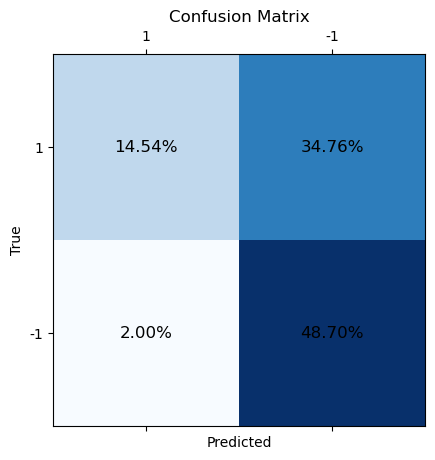

In [69]:
from implementations import sigmoid
from util.evaluation import evaluation_summary
from util.plotting import confusion_matrix

print('Train data')
x_tr_predictions = np.where(sigmoid(x_tr_normalized @ best_w) >= 0.5, 1, -1)
evaluation_summary(y_tr_oversampled, x_tr_predictions)
confusion_matrix(y_tr_oversampled, x_tr_predictions)

Test data
Accuracy: 90.29%
Precision: 41.78%
Recall: 29.66%
F1-score: 34.69%


<Figure size 800x600 with 0 Axes>

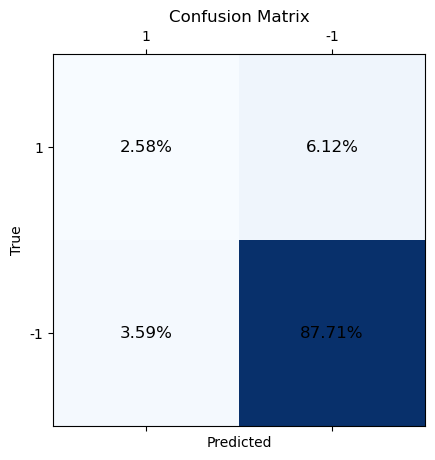

In [70]:
print('Test data')
x_valid_pred = np.where(sigmoid(x_va_normalized @ best_w) >= 0.5, 1, -1)
evaluation_summary(y_va[:,1], x_valid_pred)
confusion_matrix(y_va[:,1], x_valid_pred)

In [72]:
# to plot we run the reg logistic regression with the optimal parameters returned above
# all_losses is set to True to return all the losses to plot
from util.train import reg_logistic_regression

best_w_, train_losses_, valid_losses_ = reg_logistic_regression(
    x_tr_normalized, 
    y_tr_oversampled, 
    x_va_normalized, y_va[:,1], 
    lambda_= best_lambda,
    gamma = best_gamma, 
    w=best_initial_w,
    max_iter=5000, # before it was 2000 to save some time. But they should be same in the final implementation
    batch_size=100,
    all_losses=True
)

100%|██████████| 5000/5000 [06:22<00:00, 13.06it/s]


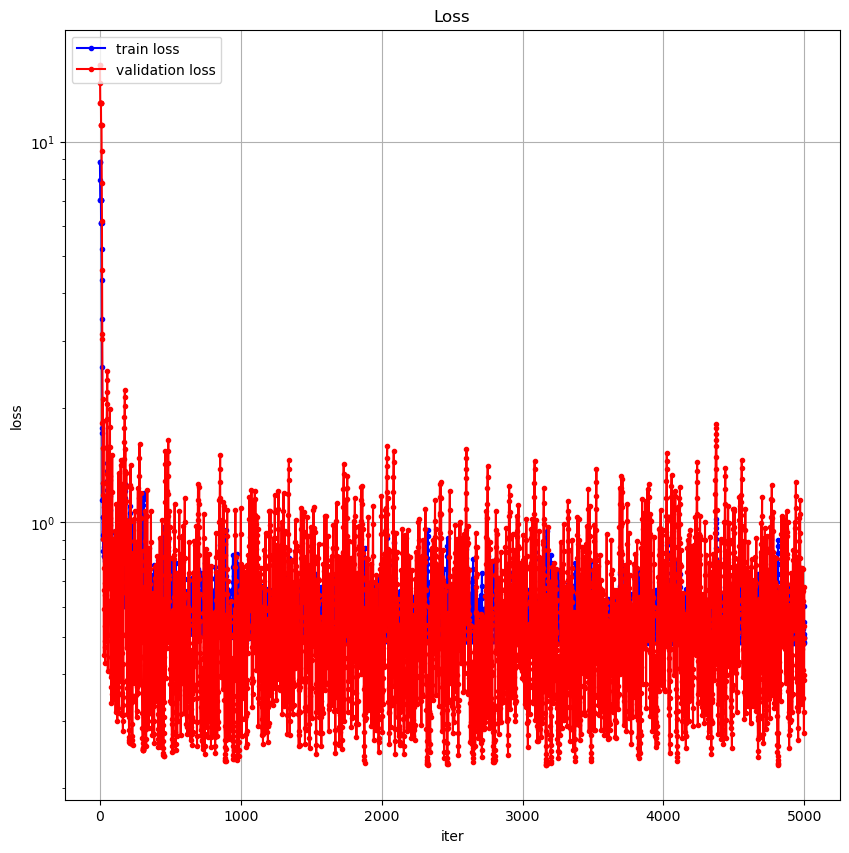

In [79]:
# Value of the gamma seems to be big. It is sensitive to the initial value of w
import matplotlib.pyplot as plt
from util.plotting import loss_visualization
plt.figure(figsize=(10, 10))
loss_visualization(train_losses_, valid_losses_)
plt.yscale("log")

Train data
Accuracy: 76.24%
Precision: 70.57%
Recall: 88.89%
F1-score: 78.68%


<Figure size 800x600 with 0 Axes>

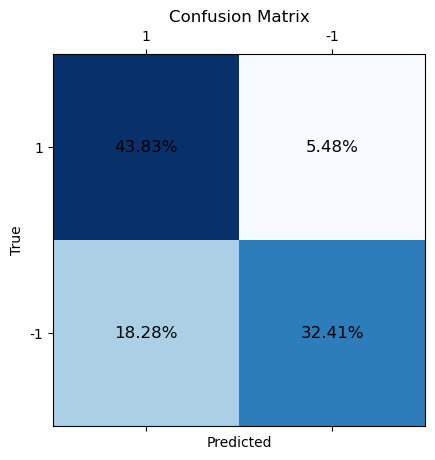

In [77]:
print('Train data')
x_tr_predictions = np.where(sigmoid(x_tr_normalized @ best_w_) >= 0.5, 1, -1)
evaluation_summary(y_tr_oversampled, x_tr_predictions)
confusion_matrix(y_tr_oversampled, x_tr_predictions)

Test data
Accuracy: 65.60%
Precision: 18.78%
Recall: 88.86%
F1-score: 31.01%


<Figure size 800x600 with 0 Axes>

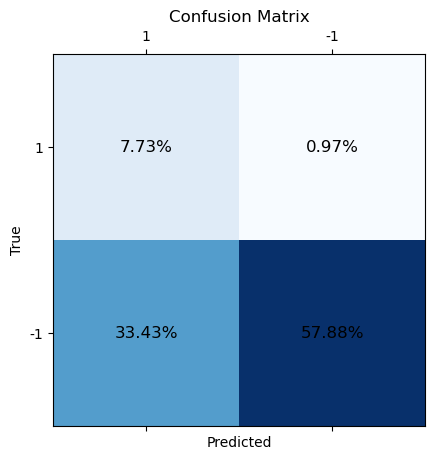

In [78]:
print('Test data')
x_valid_pred = np.where(sigmoid(x_va_normalized @ best_w_) >= 0.5, 1, -1)
evaluation_summary(y_va[:,1], x_valid_pred)
confusion_matrix(y_va[:,1], x_valid_pred)